In [1]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *
import os
import matplotlib.pyplot as plt
from fastai.vision import Path

In [2]:
my_stats = ([0.4712, 0.2012, 0.3929], [0.3411, 0.2432, 0.2331])

In [13]:
import torchvision

mobilenet_split = lambda m: (m[0][0][10], m[1])
arch  = torchvision.models.mobilenet_v2

In [14]:
class Agent:
    def setPathSave(self, path):
        self.pathSave = path
    
    def load(self, modelName):
        self.net.load(pathSave/modelName)
        
    def readData(self, path):
        self.data = (ImageList.from_folder(path) #Donde encontrar la data? -> en "path" y sus carpetas
                    .split_by_rand_pct(0.3, seed=1794)  #Como dividir ?
                    .label_from_folder()            #Como etiquetar? -> Dependiendo de los nombres de las carpetas
                    .transform(None , size = 256)     #Data augmentation? -> Usar tfms con un tamaño de imagen 256
                    .databunch(bs = 32)
                    .normalize(my_stats))
                     
    def showData(self):
        self.data.show_batch(3, figsize=(6,6), hide_axis=False)
    
    def createNeuralNetwork(self):
        self.net = cnn_learner(self.data, arch, cut=-1, split_on=mobilenet_split, pretrained= False, metrics=[accuracy])
    
    def showLearningRateGraphic(self):
        self.net.lr_find()
        self.net.recorder.plot()
    
    def train(self, epochs, minLearningRate, maxLearningRate):
         self.net.fit_one_cycle(epochs, max_lr=slice(minLearningRate, maxLearningRate), 
                               callbacks=[SaveModelCallback(self.net, every='improvement', monitor = 'accuracy', name= self.pathSave/'model')])
    
    def showConfusionMatrix(self):
        interp = ClassificationInterpretation.from_learner(self.net)
        interp.plot_confusion_matrix()
    
    def saveModel(self, filename):
        self.net.load(self.pathSave/filename)
        self.net.export(self.pathSave/Path(filename + '.pkl'))

In [15]:
agent = Agent()
pathData = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/Spectrograms2')
pathSave = Path('/home/graphter/Speech Emotion Recognition/Dataset_propio/models2')

In [16]:
agent.setPathSave(pathSave)

In [17]:
agent.readData(pathData)

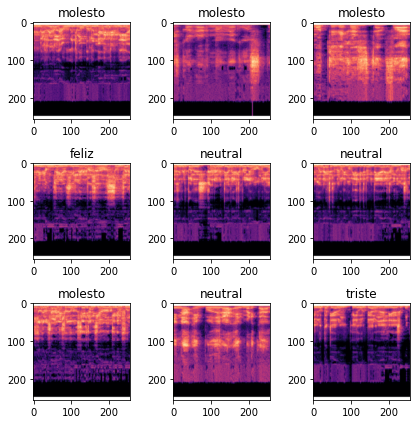

In [18]:
agent.showData()

In [19]:
agent.data.classes

['feliz', 'molesto', 'neutral', 'triste']

In [20]:
vc = pd.value_counts(agent.data.train_ds.y.items, sort=False)
vc.index = agent.data.classes
vc

feliz      72
molesto    70
neutral    67
triste     71
dtype: int64

In [21]:
vcValid = pd.value_counts(agent.data.valid_ds.y.items, sort=False)
vcValid.index = agent.data.classes
vcValid

feliz      28
molesto    30
neutral    33
triste     29
dtype: int64

In [22]:
agent.data.stats

([0.4712, 0.2012, 0.3929], [0.3411, 0.2432, 0.2331])

In [23]:
agent.createNeuralNetwork()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


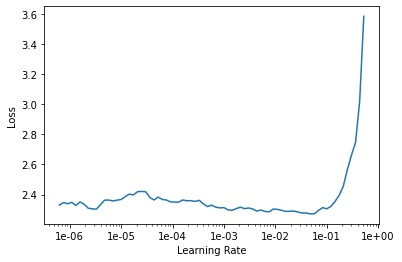

In [24]:
agent.showLearningRateGraphic()

In [25]:
agent.net.unfreeze()
agent.train(15, 5e-3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,3.083396,8.966405,0.233333,00:05
1,2.751243,7.683066,0.250000,00:04
2,2.719359,12.156756,0.241667,00:04
3,2.975480,7.868991,0.241667,00:04
4,3.479177,9.804305,0.233333,00:04
5,3.779508,10.049045,0.250000,00:04
6,3.813380,5.117066,0.266667,00:04
7,3.608252,6.091227,0.250000,00:04
8,3.321669,3.183270,0.275000,00:04
9,3.053644,4.005797,0.316667,00:04


Better model found at epoch 0 with accuracy value: 0.23333333432674408.
Better model found at epoch 1 with accuracy value: 0.25.
Better model found at epoch 6 with accuracy value: 0.2666666805744171.
Better model found at epoch 8 with accuracy value: 0.2750000059604645.
Better model found at epoch 9 with accuracy value: 0.3166666626930237.
Better model found at epoch 10 with accuracy value: 0.36666667461395264.
Better model found at epoch 13 with accuracy value: 0.375.
Better model found at epoch 14 with accuracy value: 0.40833333134651184.


In [26]:
agent.load('model-Mobilenet-40.8%')

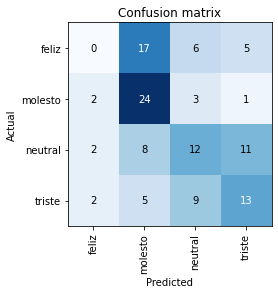

In [27]:
agent.showConfusionMatrix()

In [28]:
agent.net.validate(agent.net.data.train_dl)

[1.1278412, tensor(0.4297)]

In [29]:
agent.net.validate(agent.net.data.valid_dl)

[1.2564723, tensor(0.4083)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


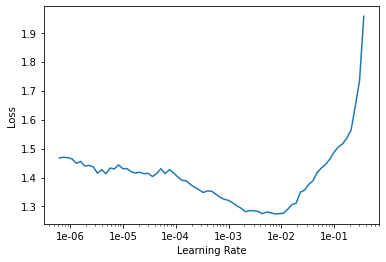

In [30]:
agent.net.unfreeze()
agent.showLearningRateGraphic()

In [31]:
len(agent.net.layer_groups)

3

In [32]:
agent.net.unfreeze()
agent.train(15, 1e-4, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.344889,1.266104,0.375000,00:04
1,1.402406,1.268604,0.450000,00:04
2,1.357869,1.304694,0.416667,00:04
3,1.327387,1.300578,0.358333,00:04
4,1.252004,1.446706,0.450000,00:04
5,1.226663,1.523965,0.475000,00:04
6,1.164307,1.406102,0.458333,00:04
7,1.100186,1.296946,0.450000,00:04
8,1.011280,1.187667,0.508333,00:04
9,0.937136,1.308023,0.491667,00:04


Better model found at epoch 0 with accuracy value: 0.375.
Better model found at epoch 1 with accuracy value: 0.44999998807907104.
Better model found at epoch 5 with accuracy value: 0.4749999940395355.
Better model found at epoch 8 with accuracy value: 0.5083333253860474.


In [39]:
agent.load('model-Mobilenet-50.8%')

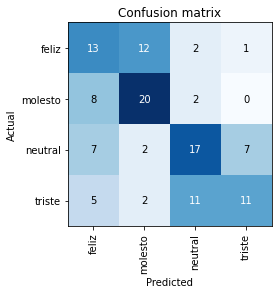

In [34]:
agent.showConfusionMatrix()

In [35]:
agent.net.validate(agent.net.data.train_dl)

[0.47339287, tensor(0.8555)]

In [36]:
agent.net.validate(agent.net.data.valid_dl)

[1.187667, tensor(0.5083)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


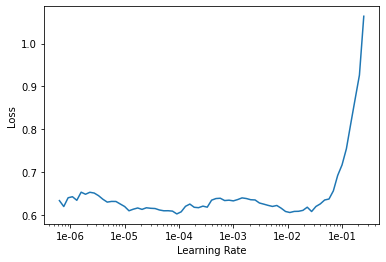

In [40]:
agent.net.freeze()
agent.showLearningRateGraphic()

In [42]:
agent.net.freeze()
agent.train(15, 1e-3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.669383,1.171495,0.516667,00:03
1,0.648969,1.197043,0.516667,00:03
2,0.601259,1.320044,0.491667,00:03
3,0.588572,1.396288,0.491667,00:03
4,0.567025,1.814728,0.400000,00:03
5,0.571639,1.683749,0.533333,00:03
6,0.538808,1.540538,0.475000,00:03
7,0.525844,1.637044,0.525000,00:03
8,0.504768,1.636224,0.516667,00:03
9,0.479106,1.602431,0.508333,00:03


Better model found at epoch 0 with accuracy value: 0.5166666507720947.
Better model found at epoch 5 with accuracy value: 0.5333333611488342.
